# **PCVK WEEK 9 - Morfologi**
- Naresh Pratista
- 2141720057
- TI-3H

In [ ]:
# Import Google Cobal
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import beberapa library

import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

### **Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV**

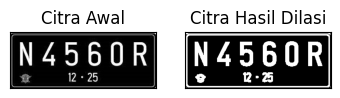

In [ ]:
#Dilasi tanpa library

def dilasi_citra(F,w):
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)


  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):

      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

img_d= cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg',0)

# pemilihan nilai threshold() bergantung pada citra (pencahayaan, tingkat noise, dan dll)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=3

imgD= dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

### **Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV**

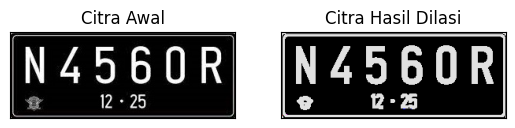

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg')
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)

# iterations = 1 : memperluas atau memperbesar area objek dalam citra biner.
# jika nilianya diubah berarti di perbesar sesuai dengan nilai tersebut
dilasi = cv2.dilate(thresh,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

### **Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV**

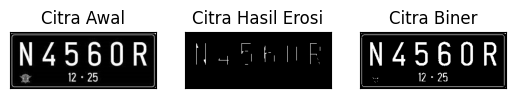

In [ ]:
# Erosi Tanpa Library
def erosi_citra(F, k):
    # Size image
    m, n = F.shape

    # Generate structure element erosi (SE)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            # mencari nilai terkecil dari array product
            imgE[i, j] = np.min(product)

    return imgE

img_e = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k = 5
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray') # plt.subplot(131) : 1 baris ,3 kolom , kolom pertama
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
# plt.xtricks([]) : menghapus kordinat x
# plt.ytricks([]) : menghapus kordinat y

plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.subplot(133) ,plt.imshow(thresh1,cmap="gray")
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.show()

### **Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV**

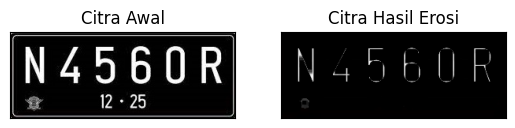

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg')

# Menggunakan kernel untuk erosi
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

# Menampilkan citra awal
plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

# Menampilkan citra hasil erosi
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

### **Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV**

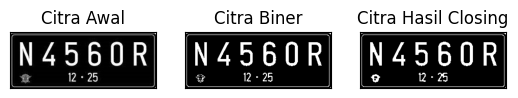

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg', 0)

# Lakukan thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # Perubahan di sini

# Buat elemen kernel
kernel = np.ones((3, 3), np.uint8)

# Operasi Closing (penutupan)
closs = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Tampilkan citra-citra
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(closs, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

### **buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5**

SED = Cross 3


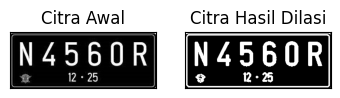

SED = Cross 5


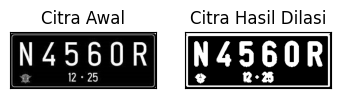

In [ ]:
# Dilasi Cross SED nilai w tidak otomatis menjadi SED (kernel)
def dilasi_citra(F, w, SED):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    constant1 = (w - 1) // 2

    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# SED = Cross 3
SED_3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

print('SED = Cross 3')

img_d = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w, SED_3)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# SED = Cross 5
SED_5 = np.array([[0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0],
                 [1, 1, 1, 1, 1],
                 [0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0]], dtype=np.uint8)

print('SED = Cross 5')

img_d = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 5
imgD = dilasi_citra(thresh, w, SED_5)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

### **Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7**

SE = Rectangle 3x5


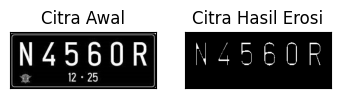

SE = Rectangle 5x7


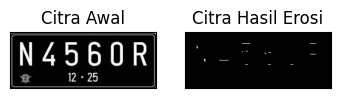

In [ ]:
# Erosi Cross SE
def erosi_citra(F, SE):
    m, n = F.shape
    constant1 = (SE.shape[0] - 1) // 2
    constant2 = (SE.shape[1] - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant1, m - constant1):
        for j in range(constant2, n - constant2):
            temp = F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE


print('SE = Rectangle 3x5')
img_e = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
SE1 = np.ones((3, 5), dtype=np.uint8)
=
imgE1 = erosi_citra(thresh1, SE1)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE1, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
SE2 = np.ones((5, 7), dtype=np.uint8)
imgE2 = erosi_citra(thresh1, SE2)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE2, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

### **Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5**

SE = Line Vertikal 3


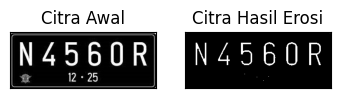

SE = Line Vertikal 5


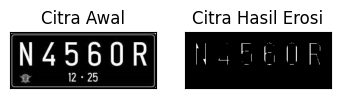

In [ ]:
# Erosi Line Vertikal SE
def erosi_citra(F, k):
    # Size image
    m, n = F.shape

    # Generate structure element erosi (SE)
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (1, k))  # SE line vertikal
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

print('SE = Line Vertikal 3')
img_e = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k = 3
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e = cv2.imread('/content/drive/MyDrive/Week 9/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k = 5
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

### **TopHat**

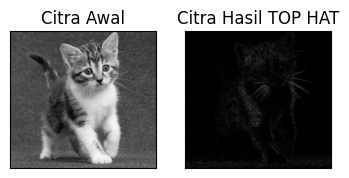

In [ ]:
# Getting the kernel to be used in Top-Hat filter
kernel_size = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Reading the image named 'plat nomer.jpg'
img = cv2.imread('/content/drive/MyDrive/Week 9/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Plot the original image and the Top-Hat result
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

### **Blackhat**

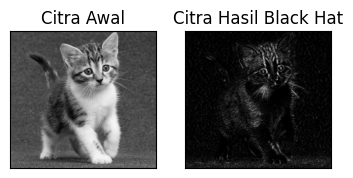

In [ ]:
# Mendefinisikan ukuran filter (kernel)
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca citra 'kitten01.jpg' dan mengubahnya ke citra grayscale
img = cv2.imread('/content/drive/MyDrive/Week 9/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan ukuran kernel baru
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5)) # 5 baris dengan 13 kolom

# Melakukan operasi Black-Hat
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

# Menampilkan citra-citra
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])

plt.show()

### **Skeleton**

In [ ]:
from skimage import filters
from skimage.morphology import skeletonize

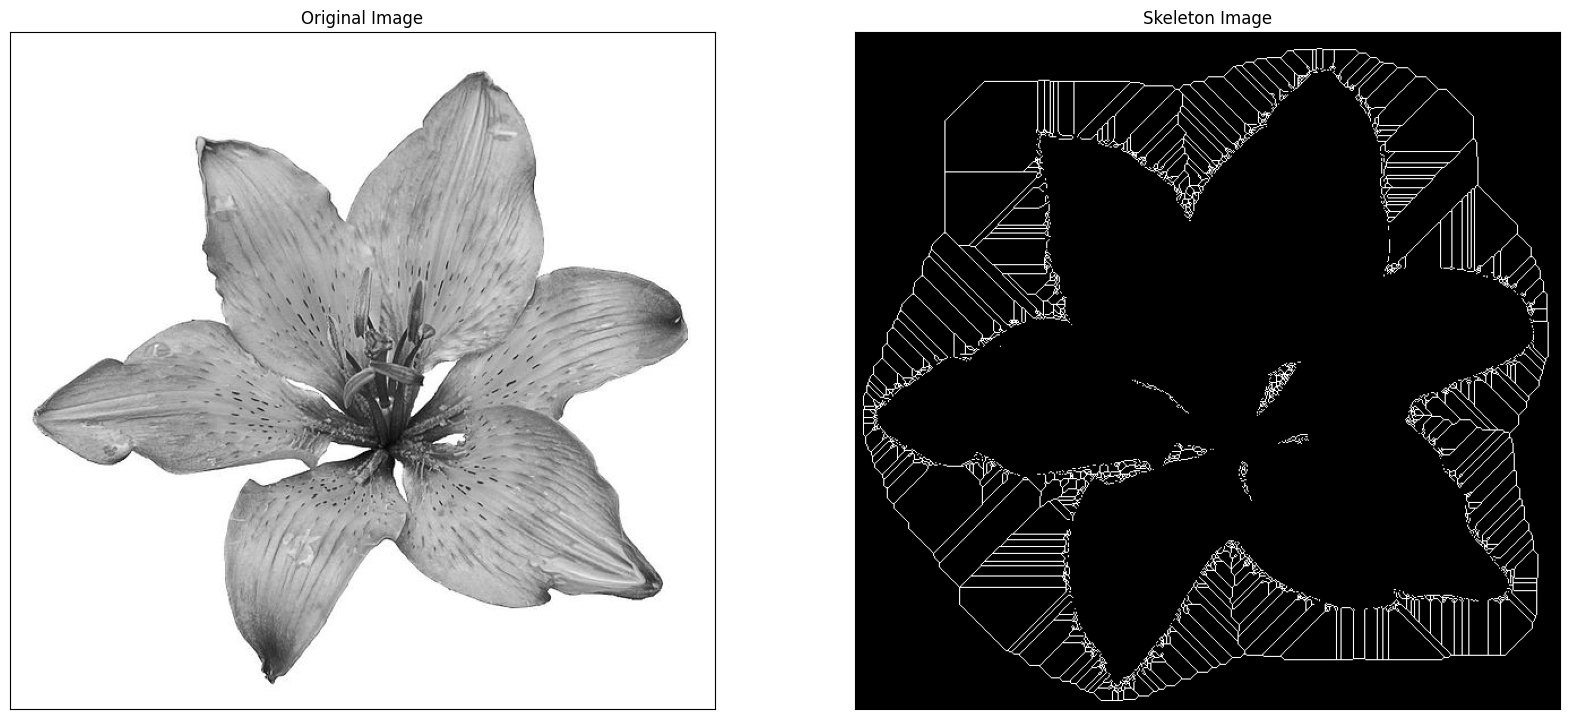

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Week 9/lily.jpg', 0)

# Konversi citra menjadi citra biner
binary = img > filters.threshold_triangle(img)
# filters.threshold_triangle(img) : 253
# binary = membangdingkan seluruh nilai pixel dengan nilai 253

# Konversi nilai True/False menjadi 1/0
binary_cp = binary.astype(int)

# Skeletonize citra biner
skeleton = skeletonize(binary_cp)

# Tampilkan citra-citra
plt.figure(figsize=(20, 20))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary_and_bin_skeleton.png")
plt.show()

### **Skeleton Inverse**

In [ ]:
from skimage import io

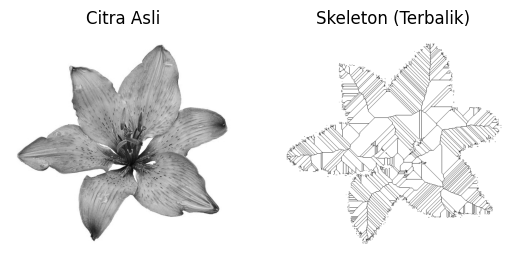

In [ ]:
img = io.imread('/content/drive/MyDrive/Week 9/lily.jpg', as_gray=True)

# Ubah citra menjadi citra biner menggunakan threshold Triangle
binary = img < filters.threshold_triangle(img)

# Skeletonize image
skeleton = skeletonize(binary)

# Tampilkan citra asli dan hasil skeletonization
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Citra Asli')
ax[0].set_axis_off()

# Perhatikan colormap yang dibalik (gray_r) untuk citra skeleton
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('Skeleton (Terbalik)')
ax[1].set_axis_off()

plt.show()

### **Thickening**

In [ ]:
from skimage.color import rgb2gray
from skimage.morphology import thin
from skimage.util import img_as_float

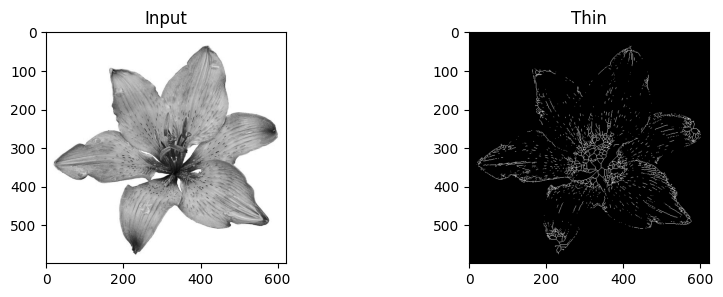

In [ ]:
image = img_as_float(rgb2gray(io.imread('/content/drive/MyDrive/Week 9/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = skeletonize(image_binary)
out_thin = thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

## **Tugas Praktikum**

- Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7.
-  Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber.
- Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.




In [42]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import morphology

In [44]:
path = '/content/drive/MyDrive/Week 7/KTP_More/ktp3.png'

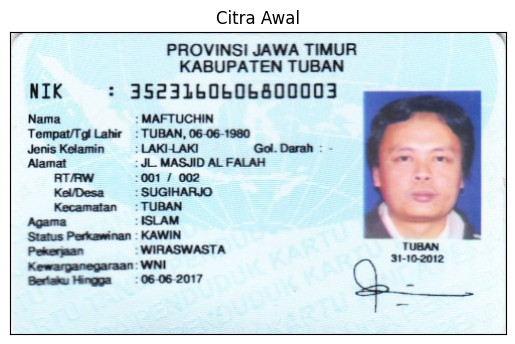

In [45]:
img = cv2.imread(path,)
img_ktp = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_ktp, cmap="gray")
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Rectangle 1x3


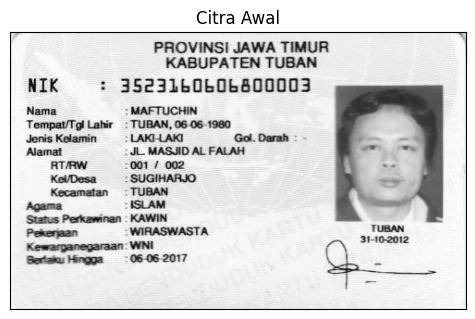

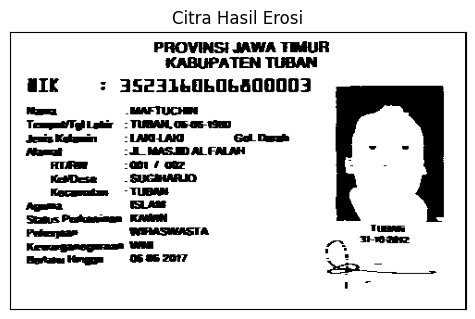

In [50]:
#Erosi Cross SE
def erosi_citra(F,p,l):

  m,n= F.shape

  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l))
  constant1= (l-1)//2
  constant2= (p-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)

  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Rectangle 1x3')
img_e= cv2.imread('/content/drive/MyDrive/Week 7/KTP_More/ktp3.png',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=3
l=1
imgE = erosi_citra(thresh1,p,l)

plt.figure(figsize=(20,16)),plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

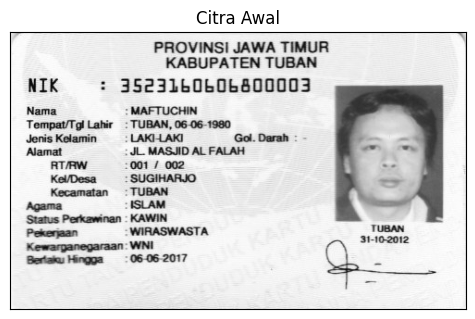

In [57]:
filterSize =(3, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Week 7/KTP_More/ktp3.png')
input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(input_image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.show()

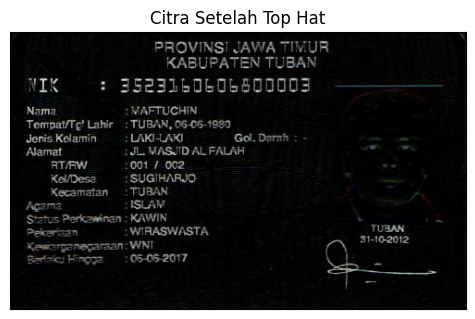

In [65]:
filterSize =(3, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img2 = cv2.imread('/content/drive/MyDrive/Week 7/KTP_More/ktp3.png')
input_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Setelah Top Hat'), plt.xticks([]), plt.yticks([])
plt.show()

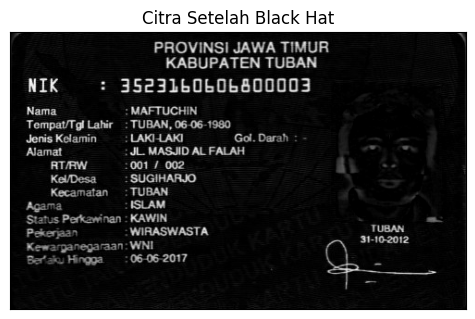

In [64]:
filterSize =(3, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat_img = cv2.morphologyEx(input_image2, cv2.MORPH_BLACKHAT, Kernel)

plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(blackhat_img,cmap = 'gray')
plt.title('Citra Setelah Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

In [60]:
img = cv2.imread('/content/drive/MyDrive/Week 7/KTP_More/ktp3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

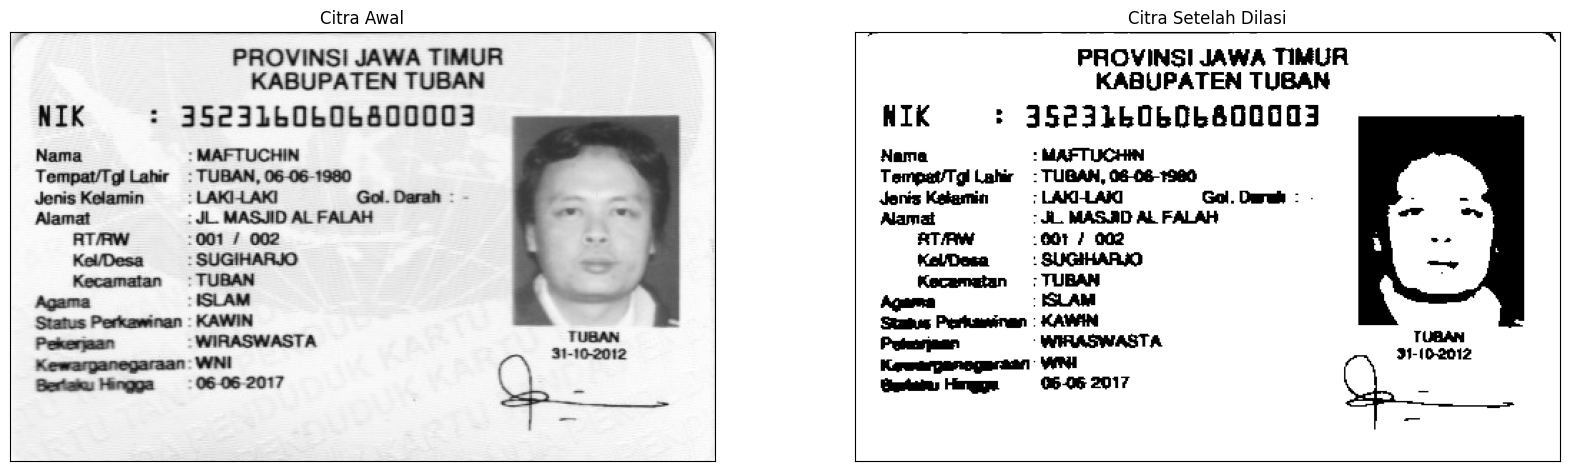

In [63]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((1,1),np.uint8)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)

plt.figure(figsize=(20,16)),plt.subplot(121),plt.imshow(gray,cmap = 'gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi,cmap = 'gray'),plt.title('Citra Setelah Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()